# Logistic Regression

In [1]:
!git clone https://github.com/HuynhDoTanThanh/logistic-regression-dataset.git
%cd logistic-regression-dataset/

Cloning into 'logistic-regression-dataset'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 11.65 KiB | 11.65 MiB/s, done.
/content/logistic-regression-dataset


### Load the Data and Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
data = pd.read_csv("Examples.csv")
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
X = data[['x1', 'x2']].values
Y = data['y'].values

### Visualize the Data

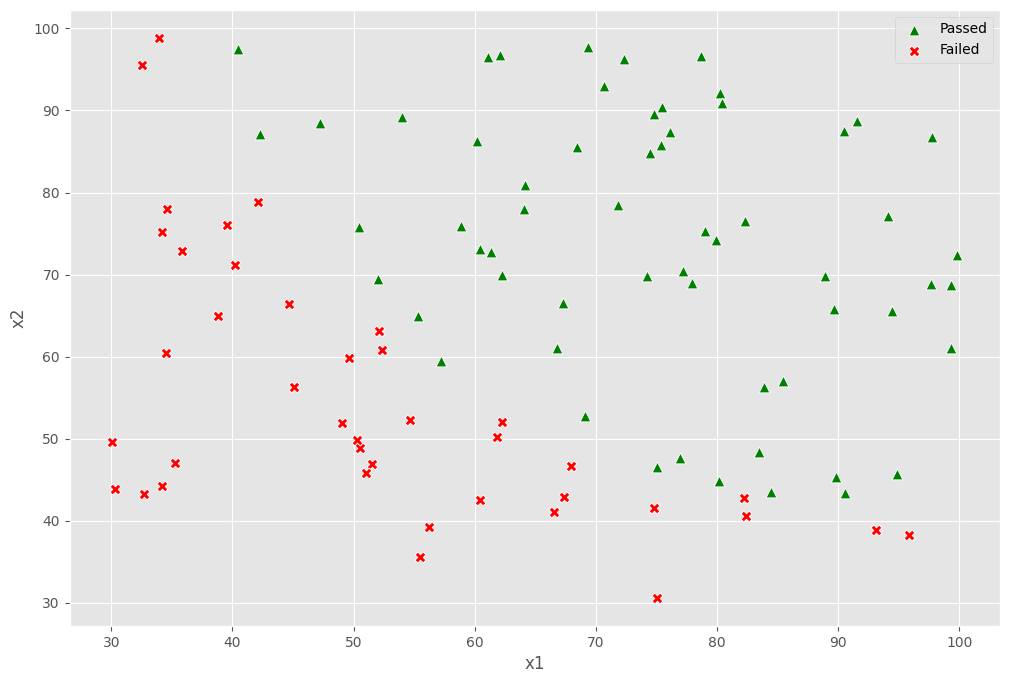

In [6]:
passed = (Y == 1).reshape(100, 1)
failed = (Y == 0).reshape(100, 1)

ax = sns.scatterplot(x = X[passed[:, 0], 0],
                     y = X[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = X[failed[:, 0], 0],
                y = X[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="x1", ylabel="x2")
ax.legend(["Passed", "Failed"])
plt.show();

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [23]:
class LogisticRegression:
  def __init__(self, lr=0.1, epochs=100):
    self.lr = lr
    self.epochs = epochs
  def sigmoid(self,z):
    return 1/(1+np.exp(-z))
  def initialize(self, X):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    weights = np.zeros((X.shape[1],1)).astype(float)
    return X, weights
  def cost_func(self, X, y):
    h = self.sigmoid(np.dot(X, self.weights))
    m = len(y)
    cost = -(1/m)*((np.dot(y.T,np.log(h)))+np.dot((1-y).T,np.log(1-h)))
    return cost
  def fit(self, X, y):
    X, weights = self.initialize(X)
    self.weights = weights
    list_cost = []
    for i in range(self.epochs):
      y_pred = self.sigmoid(np.dot(X, self.weights))
      m = len(y)
      gradient = (1/m) * np.dot(X.T, (y_pred-y.reshape(-1, 1)))
      self.weights -= self.lr*gradient
      list_cost.append(self.cost_func(X, y))
    return list_cost
  def predict(self, X):
    y_pred = self.sigmoid(np.dot(X, self.weights))
    results = [1 if i > 0.5 else 0 for i in y_pred]
    return results

In [24]:
class StandardScaler:
    def __init__(self):
        self.mean_X = None
        self.std_X = None
    def fit(self, X):
        self.mean_X = np.mean(X, axis=0)
        self.std_X = np.std(X, axis=0)
    def transform(self, X):
        return (X-self.mean_X)/self.std_X

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
clf = LogisticRegression(lr=1, epochs=400)
costs = clf.fit(X, Y)

### Plotting the Convergence of $J(\theta)$

Plot $J(\theta)$ against the number of iterations of gradient descent:

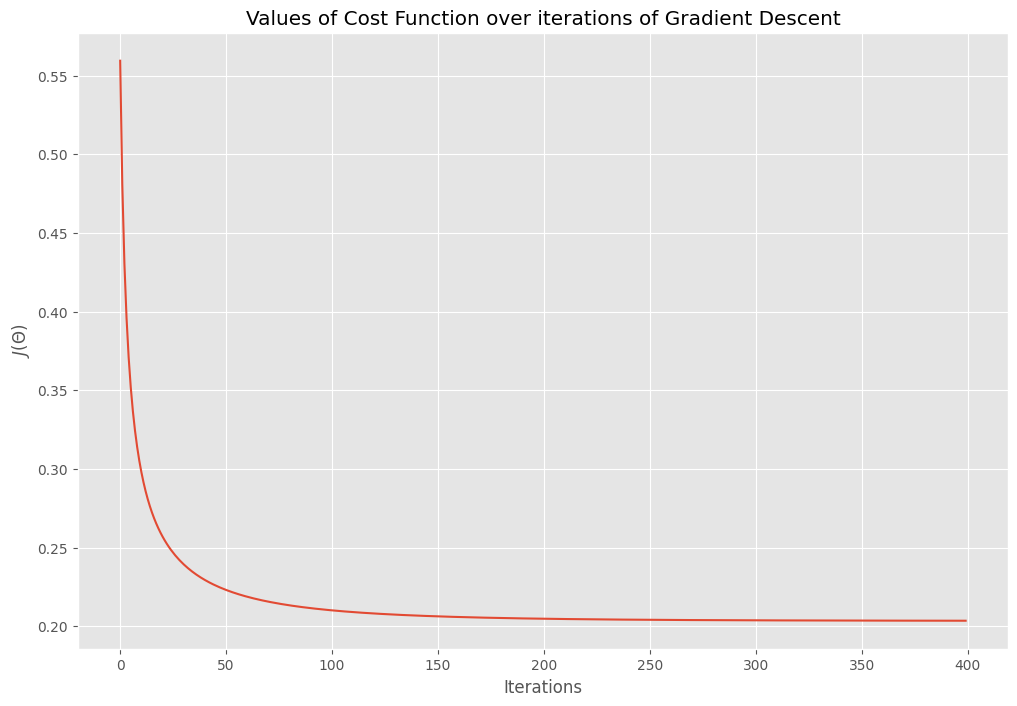

In [28]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ is the equation for the decision boundary, giving us

$ x_2 = \frac{-(\theta_0+\theta_1x_1)}{\theta_2}$

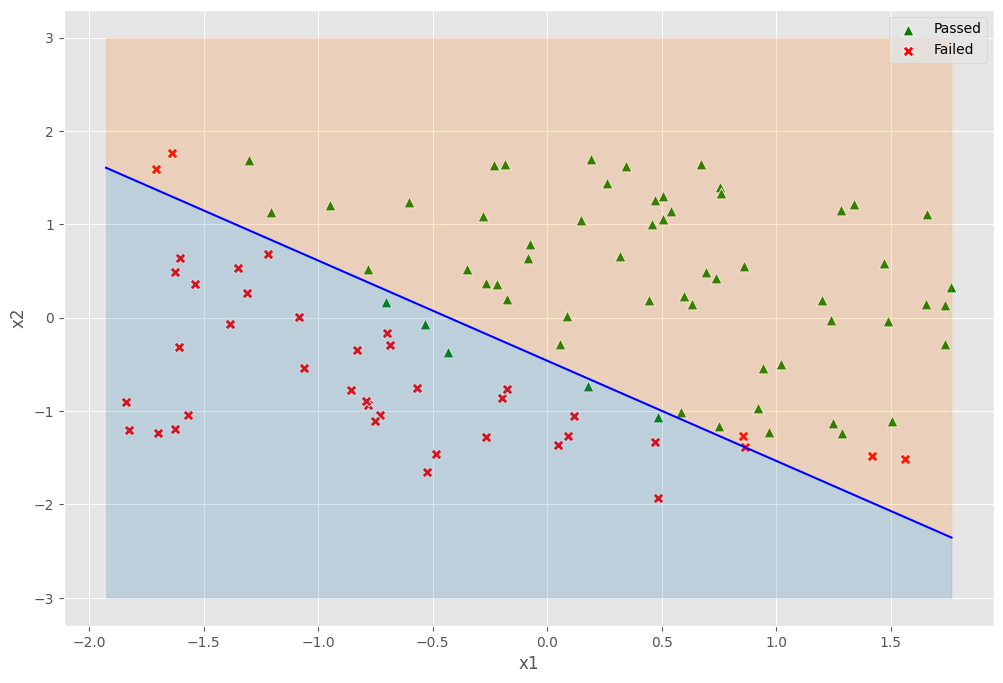

In [29]:
theta = clf.weights
sns.scatterplot(x = X[passed[:, 0], 0],
                y = X[passed[:, 0], 1],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 0],
                    y = X[failed[:, 0], 1],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="x1", ylabel="x2")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.fill_between(x_boundary, y_boundary, -3, color='tab:blue', alpha=0.2)
plt.fill_between(x_boundary, y_boundary, 3, color='tab:orange', alpha=0.2)
plt.show();

In [ ]:
def f1_score(y,y_pred):
    #ToDo
    return f1_score

In [ ]:
f1_score(Y,clf.predict(X))